# Numerical experiment 2

In [1]:
import os
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pylab as plt
from matplotlib import gridspec
os.chdir('../')
from src.dynamical_system.model import lorenz96
from src.dynamical_system.simulate import simulate_rk4
from dimensionality_reduction import Autoencoder

In [2]:
rcParams_dict = {
    'font.family':'Times New Roman',
    'mathtext.fontset':'stix',
    'font.size':15,
    'xtick.direction':'in',
    'ytick.direction':'in',
    'axes.linewidth':1.5,
    'xtick.major.size':8,
    'ytick.major.size':8,}
for key in rcParams_dict.keys():plt.rcParams[str(key)] = rcParams_dict[str(key)]

In [3]:
### DEFINE
SEED = 0
np.random.seed(seed=SEED)
F = 4.7
N = 10
X_INIT = np.random.random(N)
SIMULATION_SETTINGS={'start time':0.,
                     'ending time':1100.,
                     'time step size':0.01,}
N_UNIT_AFTER = 10000
N_STEP = 10
N_TRAIN = 4000
N_TEST = 4000
LATENT_SIZE_LIST = [1, 2, 3, 4, 5]
LATENT_SIZE = 3

In [4]:
### Simulate lorenz96
X, T = simulate_rk4(lorenz96, X_INIT, F, SIMULATION_SETTINGS)
X = X[N_UNIT_AFTER::N_STEP]
T = T[N_UNIT_AFTER::N_STEP]
T -= T[0]
### Split X into train & test sets
X_train, X_test = X[:N_TRAIN], X[N_TRAIN:N_TRAIN+N_TEST]
T_train, T_test = T[:N_TRAIN], T[N_TRAIN:N_TRAIN+N_TEST]
del X, T
### Scaling
scalar_train, scalar_test = MinMaxScaler(), MinMaxScaler()
X_train_scaled = scalar_train.fit_transform(X_train.copy())
X_test_scaled = scalar_test.fit_transform(X_test.copy())

In [5]:
### Setting autoencoder
AE_PARAMETERS={"learning_rate": 5e-4,
                "loss_function": "mse",
                "train_size_rate": 0.8,
                "batch_size": 128,
                "epoch": 500,
                "early_stopping": False,
                "early_stopping_round": 10,
                "output_log": False}

### Numerical experiments
loss_valid_list = []
for i, latent_size in enumerate(LATENT_SIZE_LIST):
    print("Experiment"+str(i+1)+" (Latent size: "+str(latent_size)+") ")
    AE_MODEL = Autoencoder(X_train_scaled.shape[1], latent_size, seed=SEED)
    AE_MODEL.fit(X_train_scaled, AE_PARAMETERS)
    loss_valid_list.append(AE_MODEL.loss_valid)
    print("   loss of valid data: "+str(AE_MODEL.loss_valid[-1]))
    del AE_MODEL

Experiment1 (Latent size: 1) 
   loss of valid data: 0.03301279619336128
Experiment2 (Latent size: 2) 
   loss of valid data: 0.013129827566444874
Experiment3 (Latent size: 3) 
   loss of valid data: 0.010123909451067448
Experiment4 (Latent size: 4) 
   loss of valid data: 0.007028697058558464
Experiment5 (Latent size: 5) 
   loss of valid data: 0.004962777718901634


In [6]:
def autoencoder_validloss_list(loss_valid_list, label_list, threshold_value=0.01, 
                             c=('g', 'b', 'r', 'm', 'c'), 
                             ls=((0, (2, 1)), (0, (5, 1)), (0, (8, 1)), (0, (2, 1, 1, 1)), (0, (5, 1, 1, 1))),
                             y_lim=(0, None)) :
    spec = gridspec.GridSpec(ncols=1, nrows=1)
    fig = plt.figure(figsize=(10, 3))
    ax = fig.add_subplot(spec[0])
    ax.axhline(y=threshold_value, linestyle='-', c='k')
    for i in range(len(loss_valid_list)): ax.plot(np.arange(1, len(loss_valid_list[i])+1), loss_valid_list[i], lw=2, c=c[i], linestyle=ls[i], label=label_list[i])
    ax.set_xlabel(r'Epoch')
    ax.set_ylabel(r'Loss')
    ax.set_ylim(y_lim[0], y_lim[1])
    fig.legend(loc="upper center", facecolor="white", edgecolor="white", bbox_to_anchor=(0.5, 1.06), ncol=len(loss_valid_list))
    plt.show()

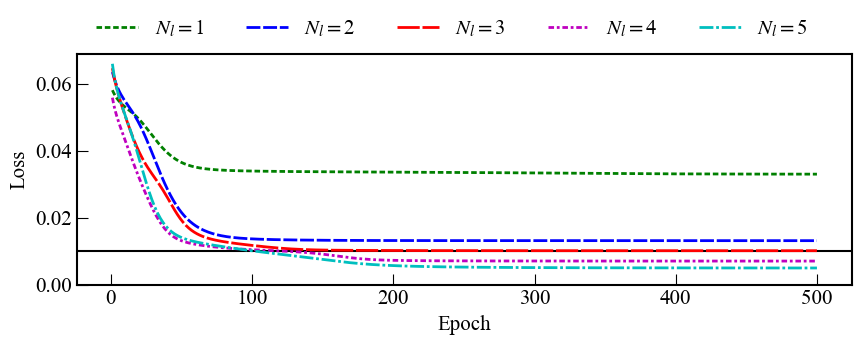

In [7]:
autoencoder_validloss_list(loss_valid_list, 
                           [r"$N_l=$"+str(LATENT_SIZE_LIST[0]),
                            r"$N_l=$"+str(LATENT_SIZE_LIST[1]),
                            r"$N_l=$"+str(LATENT_SIZE_LIST[2]),
                            r"$N_l=$"+str(LATENT_SIZE_LIST[3]),
                            r"$N_l=$"+str(LATENT_SIZE_LIST[4])], 
                            y_lim=(0, None))

In [8]:
### Setting autoencoder
AE_PARAMETERS={"learning_rate": 5e-4,
                "loss_function": "mse",
                "train_size_rate": 0.8,
                "batch_size": 128,
                "epoch": 500,
                "early_stopping": False,
                "early_stopping_round": 10,
                "output_log": True}

### Numerical experiments
AE_MODEL = Autoencoder(X_train_scaled.shape[1], LATENT_SIZE, seed=SEED)
AE_MODEL.fit(X_train_scaled, AE_PARAMETERS)
x_test = AE_MODEL.transform(X_test_scaled)
X_test_hat = scalar_test.inverse_transform(AE_MODEL.inverse_transform(AE_MODEL.transform(X_test_scaled)))

Epoch 1/500
25/25 [==============================] - 0s 5ms/step - loss: 0.0657 - val_loss: 0.0647
Epoch 2/500
25/25 [==============================] - 0s 2ms/step - loss: 0.0632 - val_loss: 0.0624
Epoch 3/500
25/25 [==============================] - 0s 1ms/step - loss: 0.0611 - val_loss: 0.0605
Epoch 4/500
25/25 [==============================] - 0s 1ms/step - loss: 0.0593 - val_loss: 0.0588
Epoch 5/500
25/25 [==============================] - 0s 2ms/step - loss: 0.0576 - val_loss: 0.0572
Epoch 6/500
25/25 [==============================] - 0s 2ms/step - loss: 0.0561 - val_loss: 0.0558
Epoch 7/500
25/25 [==============================] - 0s 2ms/step - loss: 0.0546 - val_loss: 0.0544
Epoch 8/500
25/25 [==============================] - 0s 1ms/step - loss: 0.0533 - val_loss: 0.0530
Epoch 9/500
25/25 [==============================] - 0s 2ms/step - loss: 0.0519 - val_loss: 0.0517
Epoch 10/500
25/25 [==============================] - 0s 2ms/step - loss: 0.0506 - val_loss: 0.0505
Epoch 11/

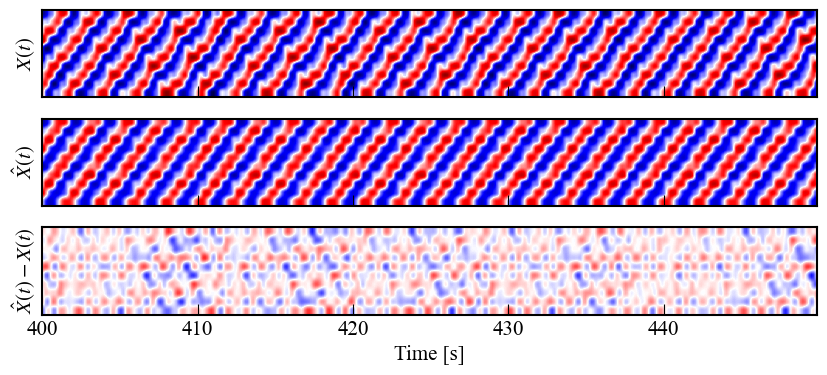

In [9]:
def autoencoder_input_output(X_input, X_output, T, n_plt, cmap12="seismic", cmap3="seismic"):
    aspect = n_plt/(X_input.shape[1]*80)
    t_min = T[0]
    t_max = T[n_plt - 1] if n_plt <= len(T) else T[-1]

    spec = gridspec.GridSpec(ncols=1, nrows=3, height_ratios=[1, 1, 1])
    fig = plt.figure(figsize=(10, 4))

    ax = fig.add_subplot(spec[0])
    ax.imshow(X_input[:n_plt].T, aspect=aspect, cmap=cmap12, 
              extent=[t_min, t_max, 1, X_input.shape[1]], 
              vmax=np.max(X_input[:n_plt]), vmin=np.min(X_input[:n_plt]))
    ax.set_ylabel(r'$X(t)$')
    ax.tick_params(labelleft=False, labelbottom=False, left=False)

    ax = fig.add_subplot(spec[1])
    ax.imshow(X_output[:n_plt].T, aspect=aspect, cmap=cmap12, 
              extent=[t_min, t_max, 1, X_output.shape[1]], 
              vmax=np.max(X_input[:n_plt]), vmin=np.min(X_input[:n_plt]))
    ax.set_ylabel(r'$\hat{X}(t)$')
    ax.tick_params(labelleft=False, labelbottom=False, left=False)

    ax = fig.add_subplot(spec[2])
    ax.imshow((X_output[:n_plt] - X_input[:n_plt]).T, aspect=aspect, cmap=cmap3, 
              extent=[t_min, t_max, 1, X_output.shape[1]], 
              vmax=np.max(np.abs(X_input[:n_plt])), vmin=-np.max(np.abs(X_input[:n_plt])))
    ax.set_ylabel(r'$\hat{X}(t)-X(t)$')
    ax.set_xlabel(r'Time [s]')
    ax.tick_params(labelleft=False, left=False)

    plt.show()

autoencoder_input_output(X_test, X_test_hat, T_test, 500, cmap12="seismic", cmap3="seismic")

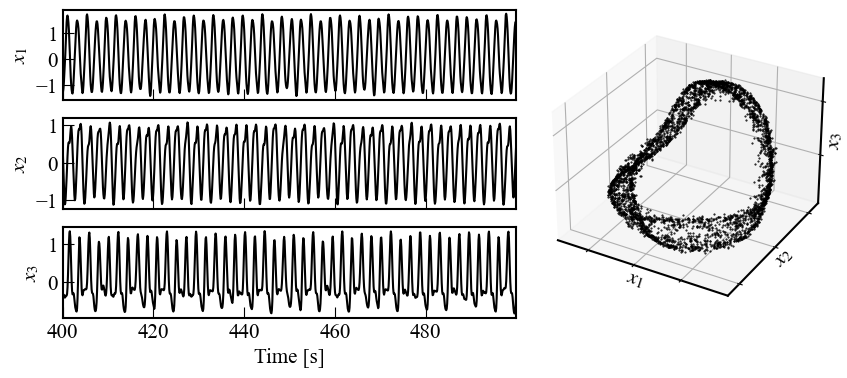

In [30]:
def autoencoder_latent(x, T, n_plt, n_attractor, sort=True):
    if sort: x = x[:, np.argsort(np.var(x, axis=0))[::-1]]
        
    spec = gridspec.GridSpec(ncols=2, nrows=3, height_ratios=[1, 1, 1], width_ratios=[1.5, 1], wspace=0.05)
    fig = plt.figure(figsize=(10, 4))

    ax = fig.add_subplot(spec[0, 0])
    ax.plot(T[:n_plt], x[:, 0][:n_plt], '-', c='k')
    ax.set_xlim(T[:n_plt][0], T[:n_plt][-1])
    ax.set_ylabel(r'$x_{1}$')
    ax.tick_params(labelbottom=False)

    ax = fig.add_subplot(spec[1, 0])
    ax.plot(T[:n_plt], x[:, 1][:n_plt], '-', c='k')
    ax.set_xlim(T[:n_plt][0], T[:n_plt][-1])
    ax.set_ylabel(r'$x_{2}$')
    ax.tick_params(labelbottom=False)

    ax = fig.add_subplot(spec[2, 0])
    ax.plot(T[:n_plt], x[:, 2][:n_plt], '-', c='k')
    ax.set_xlim(T[:n_plt][0], T[:n_plt][-1])
    ax.set_ylabel(r'$x_{3}$')
    ax.set_xlabel(r'Time [s]')

    ax = fig.add_subplot(spec[:, 1], projection='3d')
    ax.plot(x[:n_attractor, 0], x[:n_attractor, 1], x[:n_attractor, 2], '.', ms=1, c='k')
    ax.set_xlabel(r'$x_{1}$', labelpad=-15)
    ax.set_ylabel(r'$x_{2}$', labelpad=-15)
    ax.set_zlabel(r'$x_{3}$', labelpad=-15)
    ax.tick_params(labelbottom=False, labelleft=False, labelright=False)
    #ax.set_box_aspect((1,1,1))
    plt.show()

autoencoder_latent(x_test, T_test, 1000, None, sort=True)